<a href="https://colab.research.google.com/github/Yashwina/Airbnb/blob/master/Airbnb_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBnB Dataset

Below are a few things to get you started with the AirBnB dataset for AIHack! For more information on the table schemata, see [here](https://docs.google.com/document/d/1ezVFDe506zK1CuuNhNmzHEj_iNnL67hDrFzSap9V7S0/edit?usp=sharing).

In [0]:
# Download data - please only run this once
import urllib.request
import zipfile
import os

print("Starting download ...")
url = "https://github.com/aihack20/airbnb_challenge/releases/download/data/data-airbnb.zip"
with urllib.request.urlopen(url) as src:
    with open("tmp_airbnb_data.zip", "wb") as dest:
        dest.write(src.read())
print("Unpacking archive ...")
os.makedirs("airbnb_data", exist_ok=True)
with zipfile.ZipFile("tmp_airbnb_data.zip", compression=zipfile.ZIP_DEFLATED) as zip_f:
    zip_f.extractall("airbnb_data")
print("Done!")

Starting download ...
Unpacking archive ...
Done!


In [0]:
# Run this ONLY IF YOU USE GOOGLE COLAB
google_drive_dir = "aihack20"

try:
    from google.colab import drive
    drive.mount("/content/drive")
    directory = "working_dir"
    if not os.path.exists(directory):
      os.symlink(os.path.join("drive", "My Drive", google_drive_dir), directory)
except ModuleNotFoundError as err:
    print("This only works on Google Colab. Skipping ...")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
# Load the data (will take a short while)
calendar = pd.read_csv("airbnb_data/calendar.csv")
econ_state = pd.read_csv("airbnb_data/econ_state.csv")
listings = pd.read_csv("airbnb_data/listings.csv")
real_estate = pd.read_csv("airbnb_data/real_estate.csv")
venues = pd.read_csv("airbnb_data/venues.csv")
demographics = pd.read_csv("airbnb_data/demographics.csv")

## Your Hack ...

In [0]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464


In [0]:
listings.describe

<bound method NDFrame.describe of        accommodates  ... zipcode
0               2.0  ...   10464
1               4.0  ...   10464
2               4.0  ...   10464
3               3.0  ...   10464
4               4.0  ...   10464
...             ...  ...     ...
59819           2.0  ...   20910
59820           5.0  ...   20816
59821           6.0  ...   20748
59822           2.0  ...   20910
59823           2.0  ...   20743

[59824 rows x 29 columns]>

In [0]:
listings['rentals']=30-listings['availability_30']

In [0]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,rentals
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,6
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,0
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,0
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,22
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,13


In [0]:
listings_1= listings[['id', 'host_id', 'rentals', 'amenities', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price','room_type', 'city', 'state', 'zipcode']]

In [0]:
listings_1.head()

,id,host_id,rentals,amenities,accommodates,bathrooms,bedrooms,beds,price,room_type,city,state,zipcode
0,7949480,119445,6,"{""Cable TV"",""Wireless Internet"",""Air condition...",2.0,1.0,1.0,1.0,99.0,Private room,sunnysidebronx,NY,10464
1,16042478,9117975,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",4.0,1.0,1.0,1.0,200.0,Private room,sunnysidebronx,NY,10464
2,1886820,9815788,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.0,3.0,3.0,3.0,300.0,Entire home/apt,sunnysidebronx,NY,10464
3,6627449,13886510,22,"{TV,Internet,""Wireless Internet"",""Air conditio...",3.0,1.0,1.0,1.0,125.0,Entire home/apt,long island city,NY,10464
4,5557381,28811542,13,"{Internet,""Wireless Internet"",""Air conditionin...",4.0,1.0,1.0,1.0,69.0,Private room,sunnysidebronx,NY,10464


In [0]:
import numpy as np

In [0]:
listings_1['TV'] = pd.np.where(listings_1.amenities.str.contains('TV'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1['Internet'] = pd.np.where(listings_1.amenities.str.contains('Internet'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1['Air conditioning'] = pd.np.where(listings_1.amenities.str.contains('Air conditioning'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1['Free parking'] = pd.np.where(listings_1.amenities.str.contains('Free parking'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1['Breakfast'] = pd.np.where(listings_1.amenities.str.contains('Breakfast'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1['Heating'] = pd.np.where(listings_1.amenities.str.contains('Heating'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1['Smoke detector'] = pd.np.where(listings_1.amenities.str.contains('Smoke detector'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1['Carbon monoxide detector'] = pd.np.where(listings_1.amenities.str.contains('Carbon monoxide detector'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1['Family/kid friendly'] = pd.np.where(listings_1.amenities.str.contains('Family/kid friendly'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1['Kitchen'] = pd.np.where(listings_1.amenities.str.contains('Kitchen'),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
listings_1.head()

,id,host_id,rentals,amenities,accommodates,bathrooms,bedrooms,beds,price,room_type,city,state,zipcode,TV,Internet,Air conditioning,Free parking,Breakfast,Heating,Smoke detector,Carbon monoxide detector,Family/kid friendly,Kitchen
0,7949480,119445,6,"{""Cable TV"",""Wireless Internet"",""Air condition...",2.0,1.0,1.0,1.0,99.0,Private room,sunnysidebronx,NY,10464,1,1,1,1,1,1,1,1,0,0
1,16042478,9117975,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",4.0,1.0,1.0,1.0,200.0,Private room,sunnysidebronx,NY,10464,1,1,1,0,0,1,1,1,1,1
2,1886820,9815788,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4.0,3.0,3.0,3.0,300.0,Entire home/apt,sunnysidebronx,NY,10464,1,1,1,1,0,1,0,0,0,1
3,6627449,13886510,22,"{TV,Internet,""Wireless Internet"",""Air conditio...",3.0,1.0,1.0,1.0,125.0,Entire home/apt,long island city,NY,10464,1,1,1,1,0,1,1,1,1,1
4,5557381,28811542,13,"{Internet,""Wireless Internet"",""Air conditionin...",4.0,1.0,1.0,1.0,69.0,Private room,sunnysidebronx,NY,10464,0,1,1,1,0,1,1,1,1,1


In [0]:
listings_1 = listings_1.drop(columns=['amenities'])

In [0]:
listings_1.describe

<bound method NDFrame.describe of              id   host_id  ...  Family/kid friendly  Kitchen
0       7949480    119445  ...                    0        0
1      16042478   9117975  ...                    1        1
2       1886820   9815788  ...                    0        1
3       6627449  13886510  ...                    1        1
4       5557381  28811542  ...                    1        1
...         ...       ...  ...                  ...      ...
59819  16232278  84708427  ...                    0        1
59820  18560601  16290768  ...                    1        1
59821  17792195  31818247  ...                    1        1
59822  18223756  41071649  ...                    1        1
59823  18364166  23405709  ...                    1        1

[59824 rows x 22 columns]>

In [0]:
listings_2 = listings_1.dropna(axis=0,how='any')

In [0]:
listings_2.describe

<bound method NDFrame.describe of              id   host_id  ...  Family/kid friendly  Kitchen
0       7949480    119445  ...                    0        0
1      16042478   9117975  ...                    1        1
2       1886820   9815788  ...                    0        1
3       6627449  13886510  ...                    1        1
4       5557381  28811542  ...                    1        1
...         ...       ...  ...                  ...      ...
59819  16232278  84708427  ...                    0        1
59820  18560601  16290768  ...                    1        1
59821  17792195  31818247  ...                    1        1
59822  18223756  41071649  ...                    1        1
59823  18364166  23405709  ...                    1        1

[58590 rows x 22 columns]>

In [0]:
from matplotlib import pyplot as plt

In [0]:
listings_2.describe

<bound method NDFrame.describe of              id   host_id  ...  Family/kid friendly  Kitchen
0       7949480    119445  ...                    0        0
1      16042478   9117975  ...                    1        1
2       1886820   9815788  ...                    0        1
3       6627449  13886510  ...                    1        1
4       5557381  28811542  ...                    1        1
...         ...       ...  ...                  ...      ...
59819  16232278  84708427  ...                    0        1
59820  18560601  16290768  ...                    1        1
59821  17792195  31818247  ...                    1        1
59822  18223756  41071649  ...                    1        1
59823  18364166  23405709  ...                    1        1

[58590 rows x 22 columns]>

In [0]:
X = listings_2[['accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'room_type', 'TV',
       'Internet', 'Air conditioning', 'Free parking', 'Breakfast', 'Heating',
       'Smoke detector', 'Carbon monoxide detector', 'Family/kid friendly',
       'Kitchen']]
y = listings_2['rentals']

In [0]:
# Split your data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [0]:
train_X = pd.get_dummies(train_X)
val_X = pd.get_dummies(val_X)
train_X, val_X = train_X.align(val_X, join='left', axis=1)
train_X.head()

,accommodates,bathrooms,bedrooms,beds,price,TV,Internet,Air conditioning,Free parking,Breakfast,Heating,Smoke detector,Carbon monoxide detector,Family/kid friendly,Kitchen,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
18393,1.0,1.0,1.0,1.0,90.0,0,0,0,0,0,0,1,1,0,0,0,1,0
28323,6.0,1.0,3.0,3.0,150.0,1,1,1,0,1,1,1,1,1,1,1,0,0
21143,1.0,1.0,1.0,1.0,59.0,1,1,1,0,0,1,0,0,0,1,0,0,1
70,2.0,1.0,1.0,1.0,95.0,1,1,1,0,0,1,1,0,1,1,1,0,0
15778,4.0,1.0,1.0,1.0,110.0,1,1,1,0,0,1,1,1,1,1,1,0,0


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X,train_y)
rf_val_predictions  = rf_model.predict(val_X)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mse = mean_squared_error(rf_val_predictions ,val_y)

print("Validation MSE for Random Forest Model: {}".format(rf_val_mse))

Validation MSE for Random Forest Model: 104.99194670301748


In [0]:
def get_mse(max_leaf_nodes, n_estimators, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, n_estimators=n_estimators, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mse = mean_squared_error(val_y, preds_val)
    return(mse)

In [0]:
print(get_mse(10, 200, train_X,val_X,train_y,val_y))
print(get_mse(20,200, train_X,val_X,train_y,val_y))
print(get_mse(40,200,train_X,val_X,train_y,val_y))
print(get_mse(60,200,train_X,val_X,train_y,val_y))
print(get_mse(80,200,train_X,val_X,train_y,val_y))
print(get_mse(100,200,train_X,val_X,train_y,val_y))
print(get_mse(120,200,train_X,val_X,train_y,val_y))
print(get_mse(140,200,train_X,val_X,train_y,val_y))
print(get_mse(160,200,train_X,val_X,train_y,val_y))
print(get_mse(180,200,train_X,val_X,train_y,val_y))
print(get_mse(200,200,train_X,val_X,train_y,val_y))
print(get_mse(50, 5, train_X, val_X, train_y, val_y))
print(get_mse(50, 10, train_X, val_X, train_y, val_y))
print(get_mse(50, 50, train_X, val_X, train_y, val_y))
print(get_mse(50, 75, train_X, val_X, train_y, val_y))
print(get_mse(50, 88, train_X, val_X, train_y, val_y))
print(get_mse(50, 175, train_X, val_X, train_y, val_y))
print(get_mse(50, 190, train_X, val_X, train_y, val_y))
print(get_mse(50, 200, train_X, val_X, train_y, val_y))
print(get_mse(50, 205, train_X, val_X, train_y, val_y))
print(get_mse(50, 210, train_X, val_X, train_y, val_y))
print(get_mse(50, 215, train_X, val_X, train_y, val_y))
print(get_mse(70, 175, train_X, val_X, train_y, val_y))
print(get_mse(70, 180, train_X, val_X, train_y, val_y))
print(get_mse(70, 185, train_X, val_X, train_y, val_y))
print(get_mse(70, 190, train_X, val_X, train_y, val_y))
print(get_mse(70, 200, train_X, val_X, train_y, val_y))
print(get_mse(350, 195, train_X, val_X, train_y, val_y))
print(get_mse(400, 195, train_X, val_X, train_y, val_y))
print(get_mse(450, 195, train_X, val_X, train_y, val_y))
print(get_mse(500, 195, train_X, val_X, train_y, val_y))
print(get_mse(550, 195, train_X, val_X, train_y, val_y))
print(get_mse(650, 195, train_X, val_X, train_y, val_y))

94.58249882749836


KeyboardInterrupt: ignored

In [0]:
best_random_forest = RandomForestRegressor(max_leaf_nodes=400, n_estimators=195, random_state=1)
best_random_forest.fit(train_X,train_y)
pred_1 = best_random_forest.predict(val_X)
mse_1 = mean_squared_error(pred_1, val_y)
print("Mean Squared Error:" , mse_1)

Mean Squared Error: 90.92508690726034


In [0]:
from xgboost import XGBRegressor
def get_mse2(n_estimators, learning_rate, max_depth, min_child_weight, gamma, subsample, colsample_bytree):
    model = XGBRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mse2 = mean_squared_error(val_y, preds_val)
    return(mse2)

In [0]:
print(get_mse2(100, 0.1, 3, train_X, val_X, train_y, val_y))
print(get_mse2(1000, 0.05, 3, train_X, val_X, train_y, val_y))

In [0]:
print(get_mse2(100,0.1,5,2,0.15,0.8,0.8))
print(get_mse2(110,0.1,5,2,0.15,0.8,0.8))
print(get_mse2(120,0.1,5,2,0.15,0.8,0.8))
print(get_mse2(130,0.1,5,2,0.15,0.8,0.8))
print(get_mse2(140,0.1,5,2,0.15,0.8,0.8))
print(get_mse2(150,0.1,5,2,0.15,0.8,0.8))

best_n_estimators=130

In [0]:
print(get_mse2(130,0.1,3,2,0.15,0.8,0.8))
print(get_mse2(130,0.1,5,2,0.15,0.8,0.8))
print(get_mse2(130,0.1,7,2,0.15,0.8,0.8))
print(get_mse2(130,0.1,9,2,0.15,0.8,0.8))

best_max_depth=5

In [0]:
print(get_mse2(130,0.1,5,1,0.15,0.8,0.8))
print(get_mse2(130,0.1,5,3,0.15,0.8,0.8))
print(get_mse2(130,0.1,5,5,0.15,0.8,0.8))

best_min_child_weight = 1

In [0]:
print(get_mse2(130,0.1,5,1,0,0.8,0.8))
print(get_mse2(130,0.1,5,1,0.1,0.8,0.8))
print(get_mse2(130,0.1,5,1,0.2,0.8,0.8))
print(get_mse2(130,0.1,5,1,0.3,0.8,0.8))
print(get_mse2(130,0.1,5,1,0.4,0.8,0.8))
print(get_mse2(130,0.1,5,1,0.5,0.8,0.8))

best_gamma = 0

In [0]:
print(get_mse2(130,0.1,5,1,0,0.6,0.8))
print(get_mse2(130,0.1,5,1,0,0.7,0.8))
print(get_mse2(130,0.1,5,1,0,0.8,0.8))
print(get_mse2(130,0.1,5,1,0,0.9,0.8))
print(get_mse2(130,0.1,5,1,0,1,0.8))

best_subsample = 0.7

In [0]:
print(get_mse2(130,0.1,5,1,0,0.7,0.6))
print(get_mse2(130,0.1,5,1,0,0.7,0.7))
print(get_mse2(130,0.1,5,1,0,0.7,0.8))
print(get_mse2(130,0.1,5,1,0,0.7,0.9))
print(get_mse2(130,0.1,5,1,0,0.7,1))

best_colsample_bytree = 0.8

In [0]:
best_xgboost_model = XGBRegressor(n_estimators=130,learning_rate=0.1,max_depth=5,min_child_weight=1,gamma=0,subsample=0.7,colsample_bytree=0.8)
best_xgboost_model.fit(train_X,train_y)
pred_2 = best_xgboost_model.predict(val_X)
mse_2 = mean_squared_error(pred_2, val_y)
print("Mean Squared Error:" , mse_2)

[07:05:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Squared Error: 90.6231380903971


In [0]:
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

In [0]:
listings.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode', 'rentals'],
      dtype='object')

Factors highest correlated with ratings are cleanliness (0.7) and value (0.8)


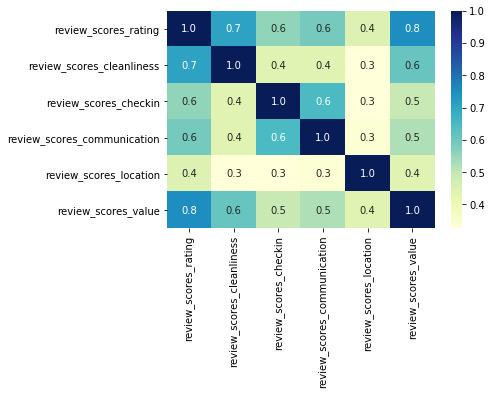

In [0]:
reviews_sep = listings[['review_scores_rating',
       'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]

sns.heatmap(reviews_sep.corr(), annot=True, fmt='.1f',  cmap="YlGnBu");
print("Factors highest correlated with ratings are cleanliness (0.7) and value (0.8)")

In [0]:
listings_1.columns

Index(['id', 'host_id', 'rentals', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'room_type', 'city', 'state', 'zipcode', 'TV',
       'Internet', 'Air conditioning', 'Free parking', 'Breakfast', 'Heating',
       'Smoke detector', 'Carbon monoxide detector', 'Family/kid friendly',
       'Kitchen'],
      dtype='object')

In [0]:
listings_1.isnull().sum()

id                            0
host_id                       0
rentals                       0
accommodates                 61
bathrooms                   202
bedrooms                     95
beds                        109
price                         0
room_type                     0
city                         46
state                         0
zipcode                     826
TV                            0
Internet                      0
Air conditioning              0
Free parking                  0
Breakfast                     0
Heating                       0
Smoke detector                0
Carbon monoxide detector      0
Family/kid friendly           0
Kitchen                       0
dtype: int64

In [0]:
from sklearn.linear_model import LinearRegression

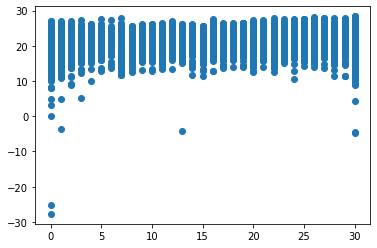

In [0]:
lmodel = LinearRegression(normalize=True)
lmodel.fit(train_X,train_y)
predictions = lmodel.predict(val_X)
plt.scatter(val_y, pred
            ictions)

In [0]:
lmodel.score(val_X, val_y)

0.06669024245666355

In [0]:
mean_squared_error(predictions, val_y)

94.58993669027582

In [0]:
from sklearn.preprocessing import Imputer

ImportError: ignored

In [0]:
imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
listings_1.bathrooms = imp.fit_transform([listings_1.bathrooms]).T

In [0]:
listings_geo = listings[['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id',  'instant_bookable', 
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode', 'rentals', 'id','latitude', 'longitude']]
listings_geo.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,instant_bookable,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,rentals,id,latitude,longitude
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,f,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,6,7949480,40.852054,-73.788680
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,t,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,0,16042478,40.853491,-73.788607
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,f,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,0,1886820,40.841144,-73.783052
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,f,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,22,6627449,40.849775,-73.786609
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,t,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,13,5557381,40.850024,-73.789328


In [0]:
listings_2 = listings_2[['host_id', 'rentals', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'room_type', 'city', 'state', 'zipcode', 'TV',
       'Internet', 'Air conditioning', 'Free parking', 'Breakfast', 'Heating',
       'Smoke detector', 'Carbon monoxide detector', 'Family/kid friendly',
       'Kitchen',  'id']]
listings_2.head()

,host_id,rentals,accommodates,bathrooms,bedrooms,beds,price,room_type,city,state,zipcode,TV,Internet,Air conditioning,Free parking,Breakfast,Heating,Smoke detector,Carbon monoxide detector,Family/kid friendly,Kitchen,id
0,119445,6,2.0,1.0,1.0,1.0,99.0,Private room,sunnysidebronx,NY,10464,1,1,1,1,1,1,1,1,0,0,7949480
1,9117975,0,4.0,1.0,1.0,1.0,200.0,Private room,sunnysidebronx,NY,10464,1,1,1,0,0,1,1,1,1,1,16042478
2,9815788,0,4.0,3.0,3.0,3.0,300.0,Entire home/apt,sunnysidebronx,NY,10464,1,1,1,1,0,1,0,0,0,1,1886820
3,13886510,22,3.0,1.0,1.0,1.0,125.0,Entire home/apt,long island city,NY,10464,1,1,1,1,0,1,1,1,1,1,6627449
4,28811542,13,4.0,1.0,1.0,1.0,69.0,Private room,sunnysidebronx,NY,10464,0,1,1,1,0,1,1,1,1,1,5557381


In [0]:
listings_2_geo = pd.merge(left=listings_2, right=listings_geo, left_on='id', right_on='id')
listings_2_geo.head()

,host_id_x,rentals_x,accommodates_x,bathrooms_x,bedrooms_x,beds_x,price_x,room_type_x,city_x,state_x,zipcode_x,TV,Internet,Air conditioning,Free parking,Breakfast,Heating,Smoke detector,Carbon monoxide detector,Family/kid friendly,Kitchen,id,accommodates_y,amenities,availability_30,bathrooms_y,bed_type,bedrooms_y,beds_y,cancellation_policy,city_y,has_availability,host_id_y,instant_bookable,metropolitan,name,price_y,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type_y,state_y,weekly_price,zipcode_y,rentals_y,latitude,longitude
0,119445,6,2.0,1.0,1.0,1.0,99.0,Private room,sunnysidebronx,NY,10464,1,1,1,1,1,1,1,1,0,0,7949480,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,f,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,6,40.852054,-73.788680
1,9117975,0,4.0,1.0,1.0,1.0,200.0,Private room,sunnysidebronx,NY,10464,1,1,1,0,0,1,1,1,1,1,16042478,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,t,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,0,40.853491,-73.788607
2,9815788,0,4.0,3.0,3.0,3.0,300.0,Entire home/apt,sunnysidebronx,NY,10464,1,1,1,1,0,1,0,0,0,1,1886820,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,f,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,0,40.841144,-73.783052
3,13886510,22,3.0,1.0,1.0,1.0,125.0,Entire home/apt,long island city,NY,10464,1,1,1,1,0,1,1,1,1,1,6627449,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,f,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,22,40.849775,-73.786609
4,28811542,13,4.0,1.0,1.0,1.0,69.0,Private room,sunnysidebronx,NY,10464,0,1,1,1,0,1,1,1,1,1,5557381,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,t,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,13,40.850024,-73.789328


In [0]:
!pip install geopandas
import geopandas as gpd

In [0]:

mapofproperties = gpd.GeoDataFrame(listings_2_geo, geometry=gpd.points_from_xy(listings_2_geo['longitude'],listings_2_geo['latitude']))
mapofproperties.crs = {'init': 'epsg:4326'}
mapofproperties.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,host_id_x,rentals_x,accommodates_x,bathrooms_x,bedrooms_x,beds_x,price_x,room_type_x,city_x,state_x,zipcode_x,TV,Internet,Air conditioning,Free parking,Breakfast,Heating,Smoke detector,Carbon monoxide detector,Family/kid friendly,Kitchen,id,accommodates_y,amenities,availability_30,bathrooms_y,bed_type,bedrooms_y,beds_y,cancellation_policy,city_y,has_availability,host_id_y,instant_bookable,metropolitan,name,price_y,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type_y,state_y,weekly_price,zipcode_y,rentals_y,latitude,longitude,geometry
0,119445,6,2.0,1.0,1.0,1.0,99.0,Private room,sunnysidebronx,NY,10464,1,1,1,1,1,1,1,1,0,0,7949480,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,f,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,6,40.852054,-73.788680,POINT (-73.78868 40.85205)
1,9117975,0,4.0,1.0,1.0,1.0,200.0,Private room,sunnysidebronx,NY,10464,1,1,1,0,0,1,1,1,1,1,16042478,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,t,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,0,40.853491,-73.788607,POINT (-73.78861 40.85349)
2,9815788,0,4.0,3.0,3.0,3.0,300.0,Entire home/apt,sunnysidebronx,NY,10464,1,1,1,1,0,1,0,0,0,1,1886820,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,f,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,0,40.841144,-73.783052,POINT (-73.78305 40.84114)
3,13886510,22,3.0,1.0,1.0,1.0,125.0,Entire home/apt,long island city,NY,10464,1,1,1,1,0,1,1,1,1,1,6627449,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,f,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,22,40.849775,-73.786609,POINT (-73.78661 40.84977)
4,28811542,13,4.0,1.0,1.0,1.0,69.0,Private room,sunnysidebronx,NY,10464,0,1,1,1,0,1,1,1,1,1,5557381,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,t,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,13,40.850024,-73.789328,POINT (-73.78933 40.85002)


In [0]:
mapofproperties = gpd.GeoDataFrame(listings_2_geo, geometry=gpd.points_from_xy(listings_2_geo['longitude'],listings_2_geo['latitude']))
mapofproperties.crs = {'init': 'epsg:4326'}
mapofproperties.head()

venues1 = venues.dropna(axis=0,how='any')

mapofvenues = gpd.GeoDataFrame(venues1, geometry=gpd.points_from_xy(venues1['longitude'],venues1['latitude']))
mapofvenues.crs = {'init': 'epsg:4326'}
mapofvenues.head()


for p in mapofproperties.itertuples():
  lowest = 100000000000000000000
  for v in mapofvenues.itertuples():
    currentvenue = v
    distances = p.geometry.distance(v.geometry)
    if distances<lowest:
      lowest = distances
  print(lowest)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


0.00018292385513509965
0.0010102177277891374
0.0011345962968604788
0.0005046938551455534
0.0010126285936867896
0.002824100986025264
0.002863268826228934
0.0027972631686060934
0.002407171037055676
0.0023040907716453977
0.004088892732117868
0.003984773650109196
0.0013773417941416832
0.003717583299140309
0.0027117167845031095
0.0038362148630699832
0.0027473767933590765
0.0015062461460656326
0.0009276771255658131
0.0018344431189080735
0.003281750291321854
0.002612609463075866
0.0038303236249420873
0.001025979265588353
0.0017343255434950102
0.002179619814789532
0.0022320674927787314
0.0025205216276919604
0.0031102353394601083
0.0004926799936710388
0.0004046585313646932
0.0007047103633887946
0.0008689757529174259
0.0006270187284650424
0.0001784511527021169
0.0006232282018895107
0.00013400256450703498
0.0007609748779718376
0.0024283200858555513
0.00032845267497163963
0.0010501212170742212
0.000149700231438019
0.00013261452442864512
0.0003955448422467574
0.0005800816753301441
0.000853355051737

KeyboardInterrupt: ignored

In [0]:
mapofproperties.head()

In [0]:
for p in listings_2_geo.iterrows():
  for v in venues1.iterrows():
    #currentvenue = mapofvenues.loc[v]
    distances = mapofproperties.loc[p].geometry.distance(mapofvenues.loc[v].geometry)
  print(min(distances))

In [0]:
#listings_2.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.4)
#for line in listings_2.iterrows():
  #dat = line[1]
  #x1 = dat['longitude']
  #y1 = dat['latitude']
  #p2 = venues
  #x2 = p2['longitude']
  #y2 = p2['latitude']
  #plt.plot([x1,x2],[y1,y2],'k-',linewidth=0.1)

In [0]:
gdf = gpd.GeoDataFrame(listings_2, geometry=gpd.points_from_xy(listings_2['longitude'],listings_2['latitude']))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

KeyError: ignored

In [0]:
import pandas as pd
import numpy as np

demographics_1 = demographics.dropna(axis=0,how='any')
demographics_2 = demographics_1[['zipcode','median_household_income','mean_household_income']]
listings_3 = listings_2[['zipcode','rentals']]
display('demographics_2','listings_3',"pd.merge(demographics_2,listings_3,on='zipcode')")
demo = pd.merge(demographics_2,listings_3,on='zipcode')
x = demo['mean_household_income']
y = demo['rentals']
plt.scatter(x,y,edgecolors='r')
plt.xlabel('Mean household income')
plt.ylabel('rentals')
plt.title('Mean household income against the number of rentals')
plt.show()

  

In [0]:
real_estate.head()

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,886900,893400,888500,883000,887900,895100,901400,911100,915300,911400,908300,908600,904200,899400,901600,911500,926600,948100,970000,979800,983700,993700,1007800,1031000.0,1055800.0,1063500.0,1062900.0,1080800,1109400,1132500,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,146300.0,146800.0,147100.0,147300.0,147800.0,148600.0,149100.0,149600.0,151100.0,153200.0,155100.0,157200.0,159100.0,160000.0,160800.0,162200.0,163200.0,164100.0,165600.0,167400.0,168000.0,168100.0,168500.0,168900.0,169100.0,170200.0,172100.0,174500.0,177100.0,180500.0,...,298800,298700,296700,296500,299700,303200,304700,305200,306800,309000,308800,306700,306600,308800,310200,310000,310400,310000,310300,311800,312500,311600,311800,313100.0,315000.0,317000.0,317500.0,317500,317900,318600,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,193800.0,193900.0,194500.0,195900.0,197900.0,200100.0,199700.0,197700.0,197600.0,199700.0,200500.0,201000.0,202100.0,202700.0,202300.0,202500.0,203000.0,203200.0,203800.0,205200.0,206900.0,209100.0,210900.0,213700.0,217400.0,220600.0,222200.0,223300.0,224300.0,225900.0,...,361900,363900,365100,367200,370100,370900,368800,365200,364000,366900,368700,363600,357600,358000,359900,359300,359100,362000,368700,379500,386800,390300,393200,397200.0,400500.0,404000.0,403500.0,401400,400100,400700,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
3,ZHVI,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,71400.0,71200.0,71600.0,72600.0,73100.0,72800.0,72800.0,72900.0,73100.0,73100.0,73300.0,73500.0,73900.0,74500.0,74900.0,75200.0,75400.0,75800.0,76200.0,76500.0,76700.0,76500.0,76400.0,76500.0,76300.0,76100.0,75900.0,75800.0,75800.0,75800.0,...,110600,110600,110800,111200,111500,111400,111300,111400,111500,111600,111700,111700,111600,111500,111500,111500,111700,111800,111800,111800,111500,111200,111200,111200.0,111200.0,111500.0,112000.0,112500,113200,113700,113800,113900,114100,114500.0,114900,115000,114700,114700,114800,114700
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,100600.0,100700.0,101300.0,102300.0,103200.0,104400.0,105200.0,105600.0,106400.0,106800.0,106600.0,106900.0,107900.0,109100.0,109600.0,109000.0,108200.0,107900.0,107900.0,108000.0,108900.0,110900.0,112800.0,114100.0,115400.0,116400.0,117000.0,117800.0,119400.0,120800.0,...,183900,185200,186100,186100,186500,188900,191000,192400,193200,193400,192200,191600,192700,195700,197200,195700,193500,192600,193400,195200,195900,195900,196000,196000.0,195600.0,195800.0,195700.0,197500,199600,199900,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700


In [0]:
# drop missing values
real_estate = real_estate.dropna()
real_estate

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,146300.0,146800.0,147100.0,147300.0,147800.0,148600.0,149100.0,149600.0,151100.0,153200.0,155100.0,157200.0,159100.0,160000.0,160800.0,162200.0,163200.0,164100.0,165600.0,167400.0,168000.0,168100.0,168500.0,168900.0,169100.0,170200.0,172100.0,174500.0,177100.0,180500.0,...,298800,298700,296700,296500,299700,303200,304700,305200,306800,309000,308800,306700,306600,308800,310200,310000,310400,310000,310300,311800,312500,311600,311800,313100.0,315000.0,317000.0,317500.0,317500,317900,318600,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,193800.0,193900.0,194500.0,195900.0,197900.0,200100.0,199700.0,197700.0,197600.0,199700.0,200500.0,201000.0,202100.0,202700.0,202300.0,202500.0,203000.0,203200.0,203800.0,205200.0,206900.0,209100.0,210900.0,213700.0,217400.0,220600.0,222200.0,223300.0,224300.0,225900.0,...,361900,363900,365100,367200,370100,370900,368800,365200,364000,366900,368700,363600,357600,358000,359900,359300,359100,362000,368700,379500,386800,390300,393200,397200.0,400500.0,404000.0,403500.0,401400,400100,400700,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
3,ZHVI,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,71400.0,71200.0,71600.0,72600.0,73100.0,72800.0,72800.0,72900.0,73100.0,73100.0,73300.0,73500.0,73900.0,74500.0,74900.0,75200.0,75400.0,75800.0,76200.0,76500.0,76700.0,76500.0,76400.0,76500.0,76300.0,76100.0,75900.0,75800.0,75800.0,75800.0,...,110600,110600,110800,111200,111500,111400,111300,111400,111500,111600,111700,111700,111600,111500,111500,111500,111700,111800,111800,111800,111500,111200,111200,111200.0,111200.0,111500.0,112000.0,112500,113200,113700,113800,113900,114100,114500.0,114900,115000,114700,114700,114800,114700
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,100600.0,100700.0,101300.0,102300.0,103200.0,104400.0,105200.0,105600.0,106400.0,106800.0,106600.0,106900.0,107900.0,109100.0,109600.0,109000.0,108200.0,107900.0,107900.0,108000.0,108900.0,110900.0,112800.0,114100.0,115400.0,116400.0,117000.0,117800.0,119400.0,120800.0,...,183900,185200,186100,186100,186500,188900,191000,192400,193200,193400,192200,191600,192700,195700,197200,195700,193500,192600,193400,195200,195900,195900,196000,196000.0,195600.0,195800.0,195700.0,197500,199600,199900,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700
5,ZHVI,77084,Houston,TX,Houston,Harris,6,75600.0,75400.0,75100.0,75100.0,74900.0,74700.0,74600.0,75000.0,75500.0,76000.0,76300.0,76700.0,77200.0,77800.0,78300.0,78900.0,79500.0,80000.0,80200.0,80400.0,80500.0,80600.0,80700.0,80900.0,81200.0,81600.0,82000.0,82600.0,83100.0,83500.0,84000.0,84500.0,85100.0,...,124200,125100,126200,127000,127900,129300,130300,130900,132300,134200,135700,136700,138100,139300,140100,140900,141900,142900,144200,145800,147100,148000,148900,150300.0,151200.0,152100.0,153300.0,156300,159900,161200,160400,160300,160400,159200.0,157000,154700,153500,154200,156700,158200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
city_count = real_estate['city'].value_counts()
city_count.head()

Los Angeles     75
Chicago         51
Phoenix         39
Philadelphia    38
Las Vegas       36
Name: city, dtype: int64

In [0]:
# drop cities with less than 75 rows
df = city_count.to_frame()
indexNames = df[df['city'] < 75].index
df.drop(indexNames, inplace = True)

In [0]:
indexNames

Index(['Chicago', 'Phoenix', 'Philadelphia', 'Las Vegas', 'Springfield',
       'Jacksonville', 'San Diego', 'Nashville', 'San Jose', 'Columbus',
       ...
       'Bruceville', 'Forest Lakes', 'Stuarts Draft', 'New Britain Township',
       'Town of Johnstown', 'Lanesboro', 'White Haven', 'Streamwood', 'Ovid',
       'San Martin'],
      dtype='object', length=5005)

In [0]:
indices = real_estate[real_estate['city'].isin(indexNames)].index

In [0]:

real_estate = real_estate.drop(axis = 1, columns = real_estate.loc[:, '1996-04':'2015-12'])
real_estate = real_estate.drop(indices)

In [0]:
type_ = real_estate[real_estate['type'] == 'ZRI'].index
real_estate = real_estate.drop(type_)

In [0]:
real_estate['ave_index2016'] = real_estate.loc[:, '2016-01':'2016-12'].sum(axis=1)/12

In [0]:
real_estate = real_estate.drop(columns = real_estate.loc[:, '2016-01':'2017-06'])

from sklearn.preprocessing import minmax_scale

scaled = minmax_scale(real_estate['ave_index2016'])
real_estate['scaled'] = scaled
real_estate.head()

,type,zipcode,city,state,metro,county,size_rank,ave_index2016,scaled
21,ZHVI,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,22,1241775.0,0.425781
57,ZHVI,90034,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,58,965500.0,0.300817
63,ZHVI,90044,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,64,356525.0,0.025367
83,ZHVI,90026,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,84,792625.0,0.222623
118,ZHVI,90066,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,119,1164550.0,0.390850


In [0]:
!pip install folium --upgrade pip

import folium
map_ = folium.Map([34.2012,-118.4662],zoom_start=11)

     |████████████████████████████████| 92kB 2.7MB/s 
     |████████████████████████████████| 1.4MB 35.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.10.1 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [0]:
import json
with open("/content/drive/My Drive/aihack20/la-zip-code-areas-2012.geojson") as jsonFile:
    data = json.load(jsonFile)
tmp = data

In [0]:
folium.Choropleth(geo_data = tmp, fill_opacity=0.7, line_opacity=0.2, 
                  data = real_estate, key_on = 'feature.properties.name', 
                  columns = ['zipcode','scaled'], fill_color = 'RdYlGn',
                 legend_name= 'ZHVI Ratings in Los Angeles')
folium.LayerControl().add_to(map_)

In [0]:
map_